# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import joblib
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
def style_plot(fig_size=(10, 6), title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=fig_size)
    plt.title(title, fontsize=16, weight='bold', pad=15) if title else None
    plt.xlabel(xlabel, fontsize=12) if xlabel else None
    plt.ylabel(ylabel, fontsize=12) if ylabel else None
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine()

In [7]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numCols = df.select_dtypes(include=[np.number]).columns.tolist()
catCols = df.select_dtypes(include=['object']).columns.tolist()

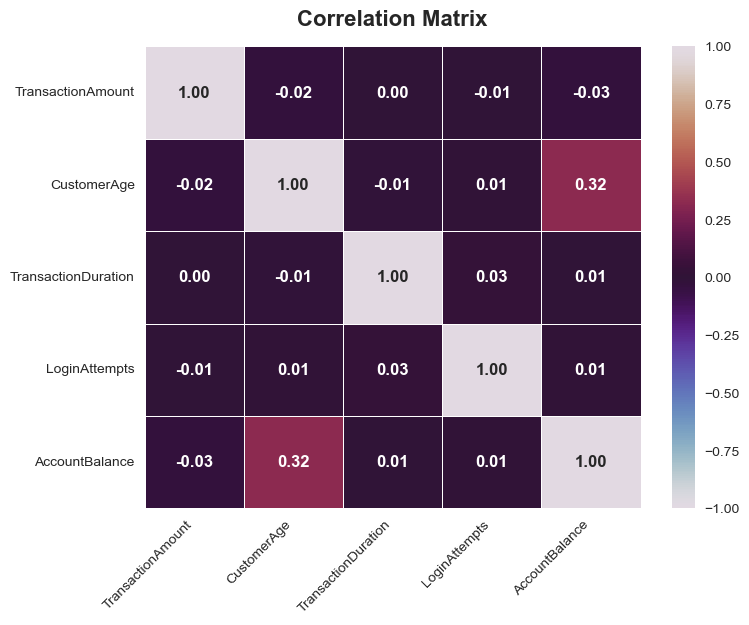

In [8]:
style_plot(fig_size=(8,6), title='Correlation Matrix')

numDf = df[numCols]

sns.heatmap(numDf.corr(),
            annot=True,
            cmap='twilight',
            vmin=-1,
            vmax=1, 
            center=0,
            fmt='.2f', annot_kws={'size': 12, 'weight': 'bold'}, 
            linewidths=0.5, 
            linecolor='white')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [9]:
# - Beberapa korelasi terlihat lemah (mendekati 0), yang berarti setiap 
# fitur kebanyakan independen. Korelasi paling kuat ada pada 
# AccountBalance dan CustomerAge (0.32), yang mengindikasikan semakin 
# tua seorang customer maka semakin banyak tabungannya.
# - Korelasi yang rendah antara TransactionAmount dan LoginAttempts 
# menunjukkan bahwa dua fitur ini cocok digunakan untuk mendeteksi 
# anomali pada analisis fraud nantinya. Karena kedua fitur memiliki 
# informasi unik dan independen.

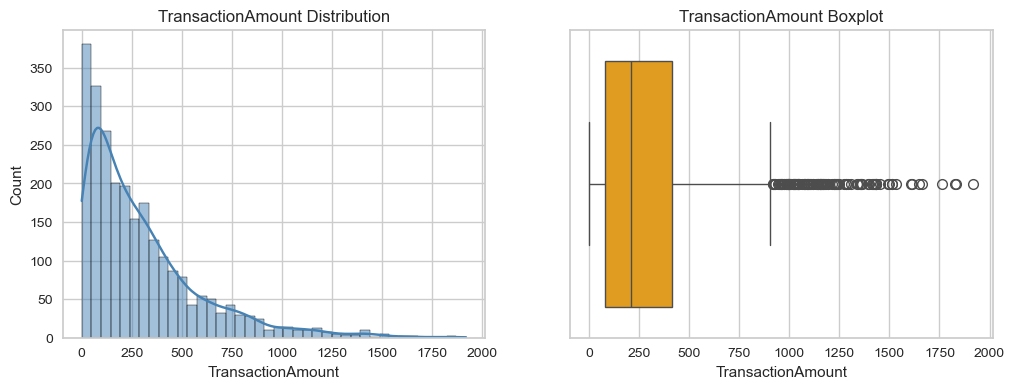

count    2511.000000
mean      297.656468
std       292.230367
min         0.260000
25%        81.310000
50%       211.360000
75%       413.105000
max      1919.110000
Name: TransactionAmount, dtype: float64
Skewness: 1.74, Kurtosis: 3.63



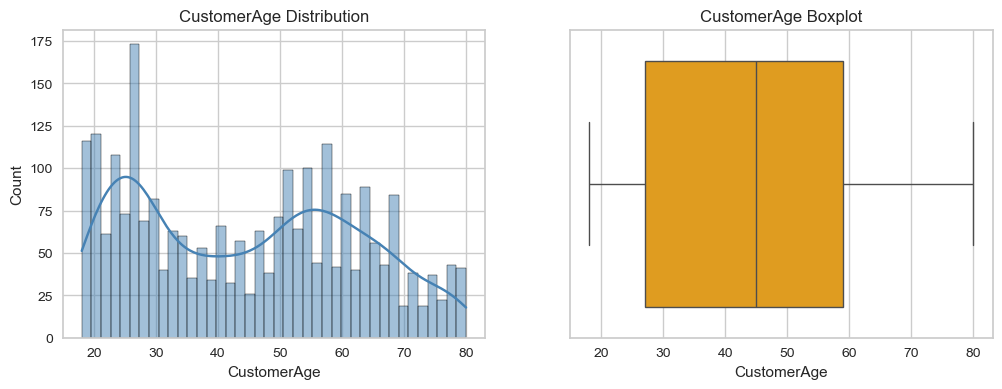

count    2519.000000
mean       44.678444
std        17.837359
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64
Skewness: 0.15, Kurtosis: -1.22



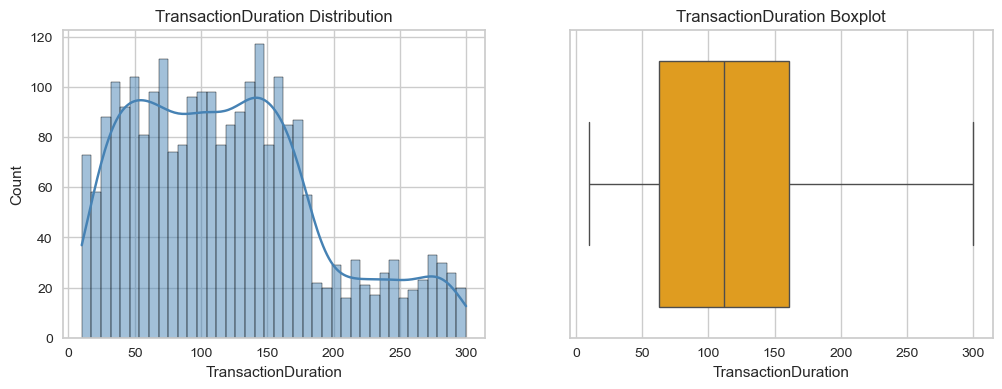

count    2511.000000
mean      119.422939
std        70.078513
min        10.000000
25%        63.000000
50%       112.000000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64
Skewness: 0.61, Kurtosis: -0.25



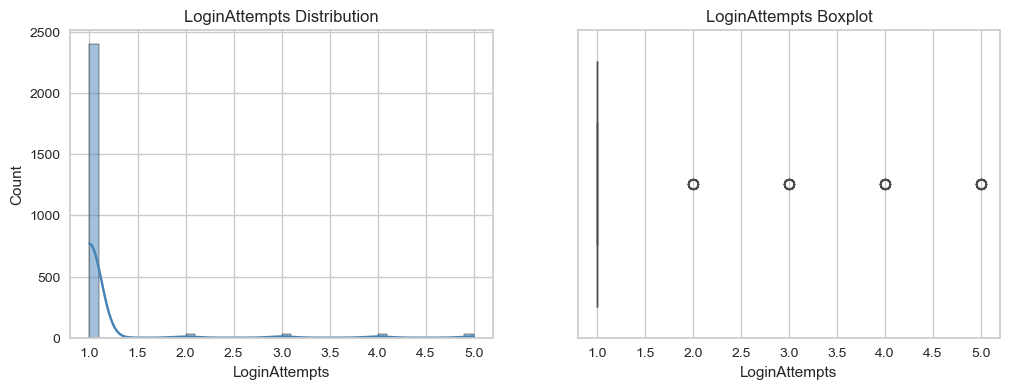

count    2516.000000
mean        1.121622
std         0.594469
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64
Skewness: 5.24, Kurtosis: 27.46



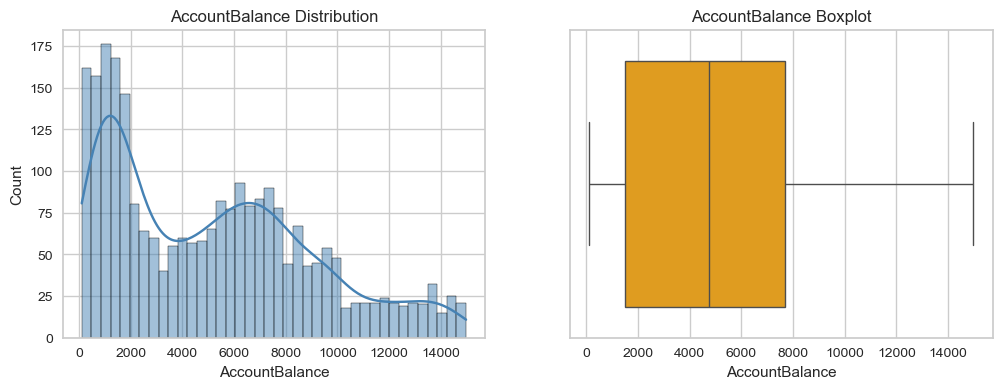

count     2510.000000
mean      5113.438124
std       3897.975861
min        101.250000
25%       1504.727500
50%       4734.110000
75%       7672.687500
max      14977.990000
Name: AccountBalance, dtype: float64
Skewness: 0.60, Kurtosis: -0.57



In [10]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
for col in numCols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], kde=True, bins=40, ax=axes[0], color="steelblue")
    axes[0].set_title(f"{col} Distribution")
    sns.boxplot(x=df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"{col} Boxplot")
    plt.show()
    print(df[col].describe().T)
    print(f"Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}\n")

In [11]:
# LoginAttempts menunjukkan peluang sebuah transaksi merupakan fraud 
# atau tidak. Transaksi dengan attempt>1 'kemungkinan' mengindikasikan 
# percobaan takeover akun. Sedangkan attempt>=5 menunjukkan sebuah 
# anomali, karena percobaan masuk ke akun dengan attempt sebanyak itu 
# merupakan salahs satu indikator fraud.

In [12]:
catCols

['TransactionID',
 'AccountID',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerOccupation',
 'TransactionDate']

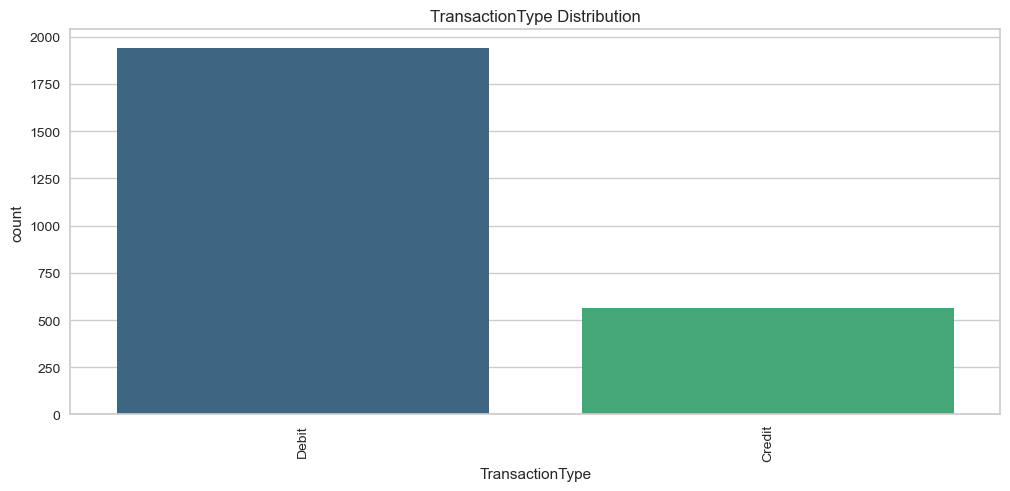

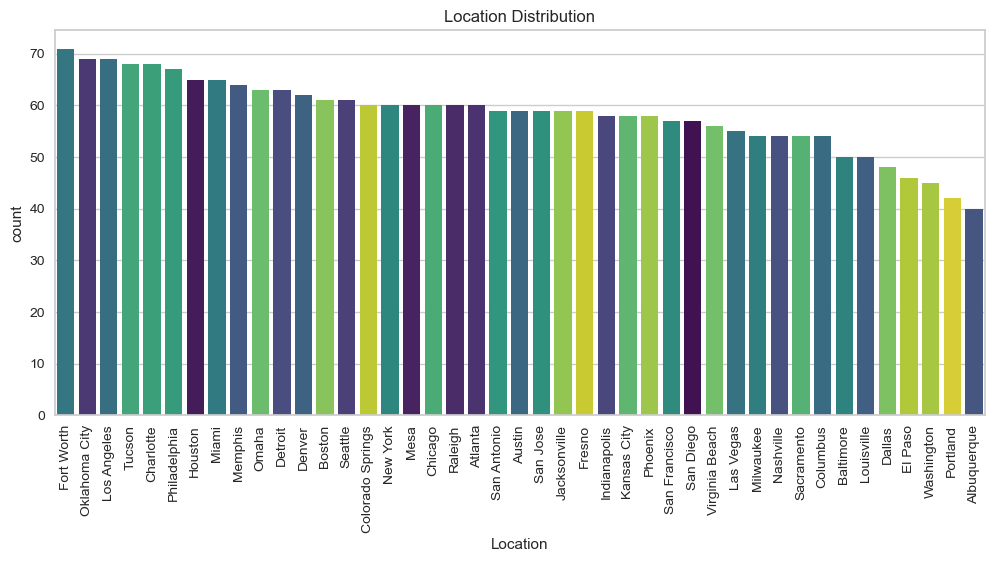

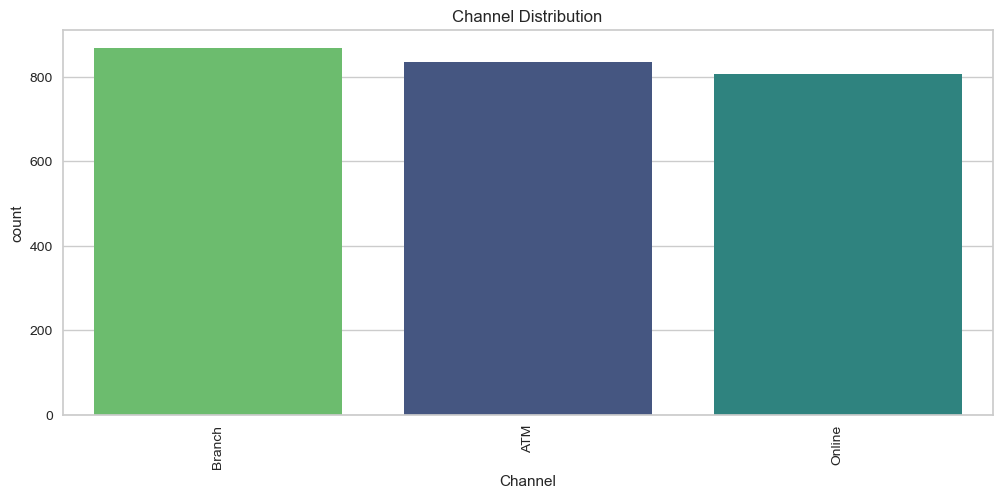

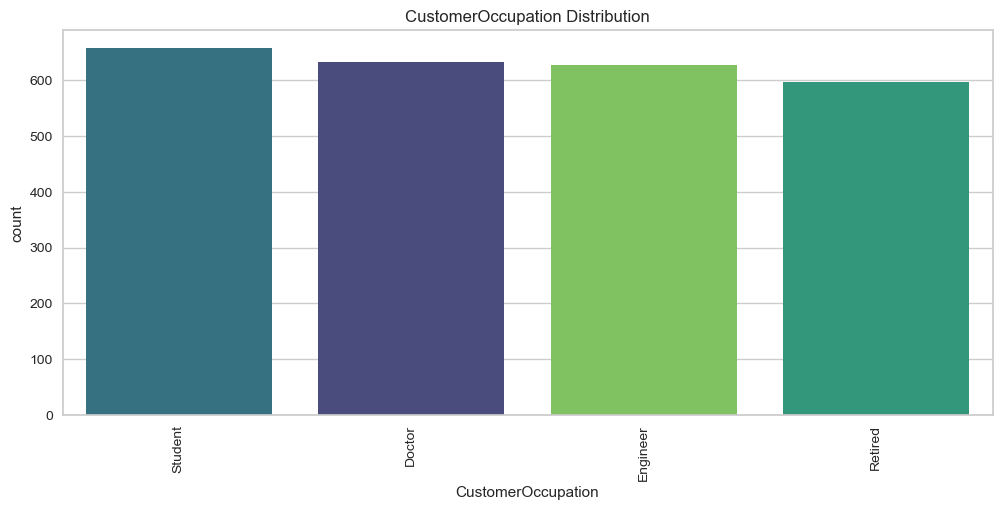

In [13]:
catCols = [
    'TransactionType',
    'Location',
    'Channel',
    'CustomerOccupation',
]

for col in catCols:
    plt.figure(figsize=(12,5))
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, hue=col, palette="viridis", legend=False)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=90)
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

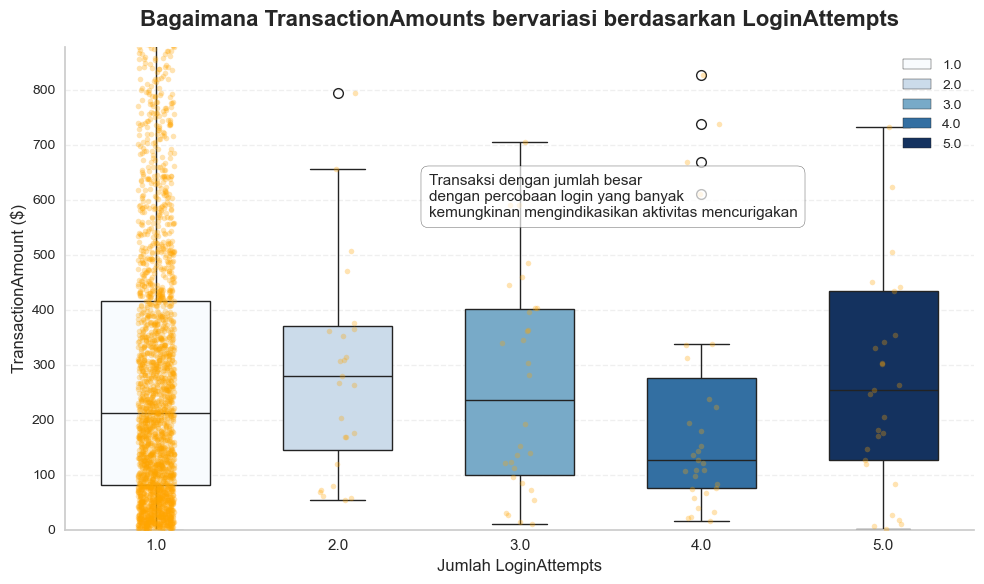

In [14]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
style_plot(title='Bagaimana TransactionAmounts bervariasi berdasarkan LoginAttempts',
           xlabel ='Jumlah LoginAttempts',
           ylabel = 'TransactionAmount ($)')

sns.boxplot(x='LoginAttempts',
            y='TransactionAmount',
            data=df,
            hue='LoginAttempts',
            palette='Blues',
            width=0.6)

sns.stripplot(x='LoginAttempts', 
              y='TransactionAmount', 
              data=df,
              size=4, color='orange', alpha=0.3, jitter=True)

plt.xticks(fontsize=11)
plt.ylim(0, df['TransactionAmount'].quantile(0.95))

plt.annotate('Transaksi dengan jumlah besar\ndengan percobaan login yang banyak\nkemungkinan mengindikasikan aktivitas mencurigakan', 
             xy=(2, df[df['LoginAttempts'] > 1]['TransactionAmount'].median()), 
             xytext=(1.5, df['TransactionAmount'].quantile(0.85)),
             fontsize=11,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

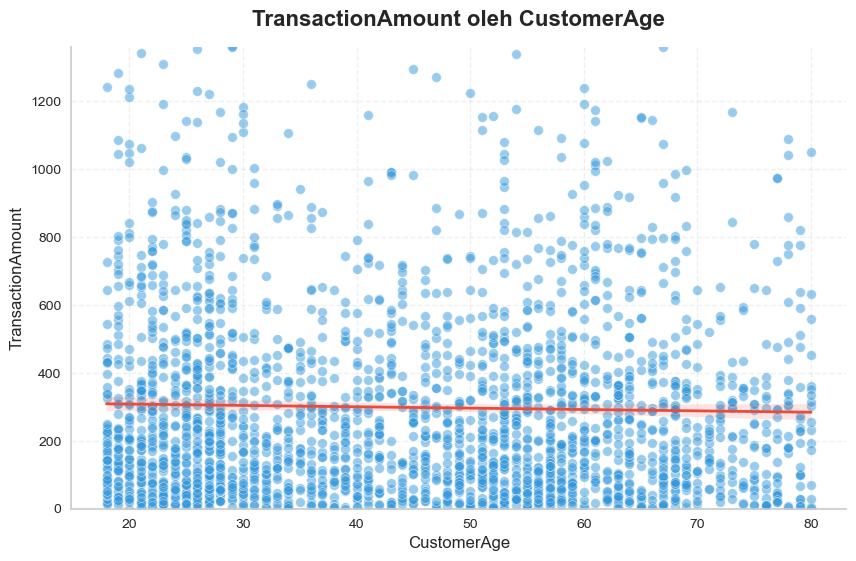

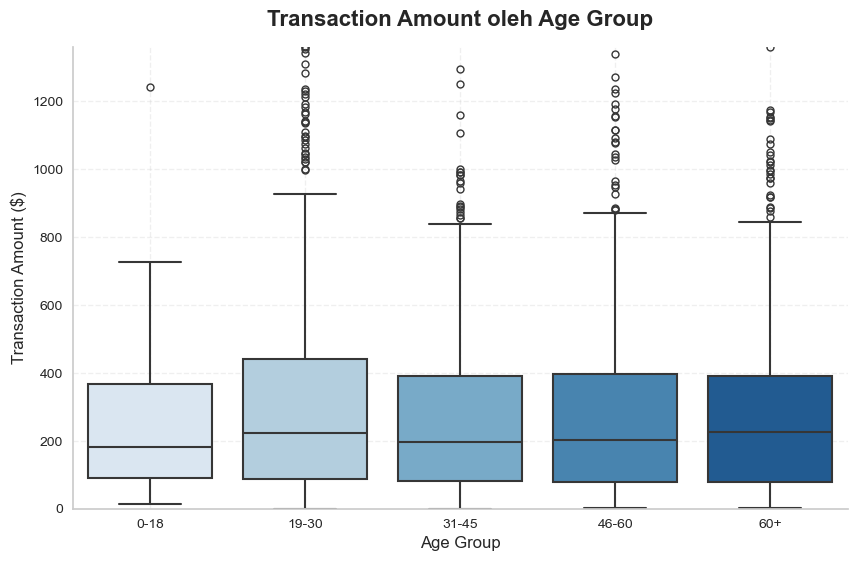

In [15]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 18, 30, 45, 60, 100], 
                        labels=['0-18', '19-30', '31-45', '46-60', '60+'])

style_plot(fig_size=(10, 6), title='TransactionAmount oleh CustomerAge', 
           xlabel='CustomerAge', 
           ylabel='TransactionAmount($)')

sns.scatterplot(x='CustomerAge', y='TransactionAmount', 
                data=df, color='#3498db', alpha=0.5)

sns.regplot(x='CustomerAge', y='TransactionAmount', data=df, 
            scatter=False, color='#e74c3c', line_kws={'lw': 2})

plt.ylim(0, df['TransactionAmount'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

style_plot(fig_size=(10, 6), title='Transaction Amount oleh Age Group', 
           xlabel='Age Group', 
           ylabel='Transaction Amount ($)')

sns.boxplot(x='AgeGroup', y='TransactionAmount', data=df, hue='AgeGroup', palette='Blues', linewidth=1.5, fliersize=5, legend=False)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, df['TransactionAmount'].quantile(0.99))
plt.show()

In [ ]:
# Dapat kita lihat dari scatter plot pertama, plot regresi tidak menunjukkan adanya tren peningkatan yang mengatakan bahwa 
# semakin tua customer, maka transaksi yang dilakukan semakin besar (ditandai dengan garis merah). 
# Pada boxplot di bawahnya juga dapat kita lihat bahwa transaksi pada setiap age group hanya meningkat sedikit saja, bahkan dari umur 19-30 tahun ke umur
# 31-45 tahun, besar transaksinya menurun. 

# Informasi Penting yang bisa didapat:
# - Anomali transaksi besar pada umur 60+ patut diwaspadai, hal ini dapat terlihat dari outlier yang sangat banyak pada boxplot di atas. Kelompok usia ini 
# sering menjadi target penipuan seperti phishing (email palsu dari bank) atau penipuan melalui telepon.
# - Anomali juga terdapat pada umur 0-18 tahun, dengan adanya sebuah outlier. Secara logika, anak-anak atau remaja jarang memiliki sumber dana 
# atau limit kartu kredit untuk melakukan transaksi besar. Jika ada transaksi bernilai tinggi, kemungkinannya adalah Akun tersebut telah dicuri (di-hack).

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [17]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
AgeGroup                   18
dtype: int64

In [18]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [19]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numCols]), columns=numCols)
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [20]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.update(df_scaled)
toDrop = ['AccountID', 'DeviceID', 'MerchantID', 'TransactionID', 'IP Address', 'AgeGroup']
df = df.drop(columns=toDrop)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoders = {}

for col in catCols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [22]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

In [24]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [26]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [27]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,0.154444,0.788756,21.424617,1.011073,0.430476,1.528535,0.378091,0.030239,0.336489
std,0.152255,0.437496,12.432136,0.829195,0.287711,1.154655,0.243118,0.147198,0.262597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042249,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093553
50%,0.109899,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.309532
75%,0.214105,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.510548
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


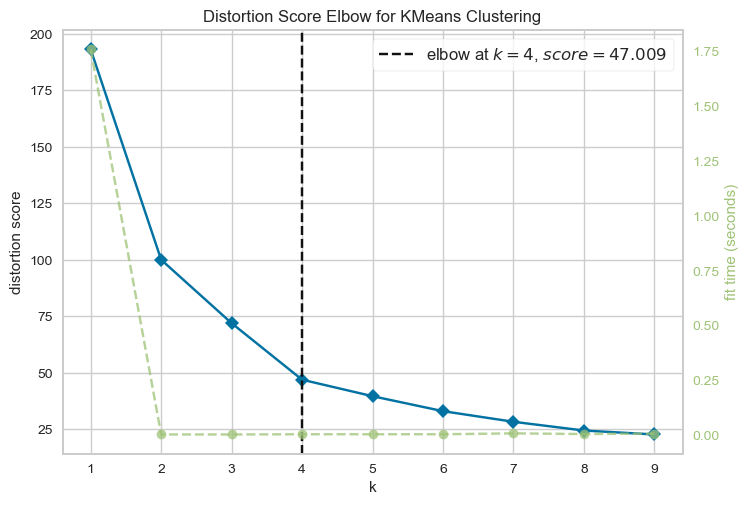

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
features = ['TransactionAmount', 'TransactionDuration']
X = df[features].copy()

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [29]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


Jalankan cell code ini untuk menyimpan model kamu.

In [30]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# Menghitung dan menampilkan nilai Silhouette Score.
df['Cluster'] = kmeans.labels_
silhouette_score(X, kmeans.fit_predict(X))

0.44560815179032204

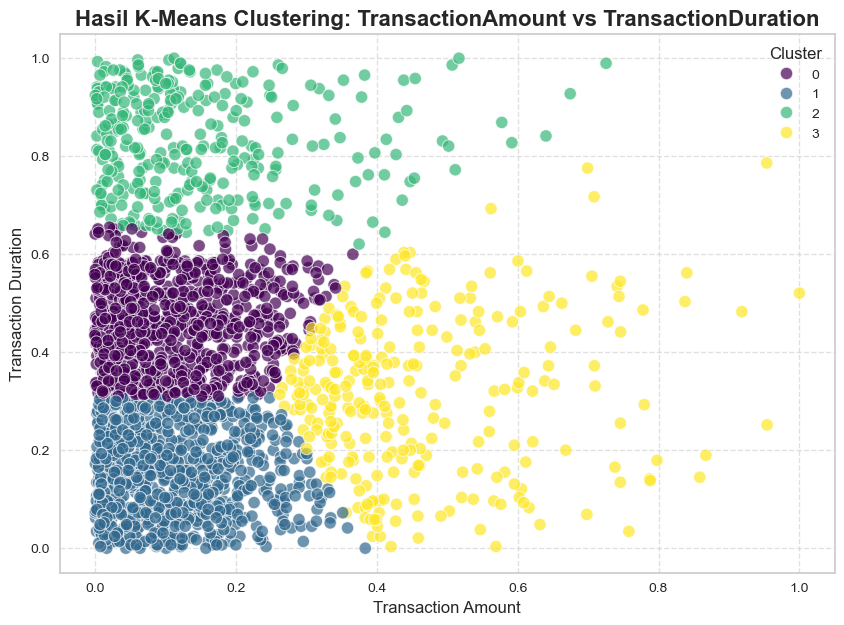

In [32]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 7))

sns.scatterplot(x=X['TransactionAmount'], y=X['TransactionDuration'], hue=df['Cluster'],
                palette='viridis', s=80, alpha=0.7, legend='full')

plt.title('Hasil K-Means Clustering: TransactionAmount vs TransactionDuration', fontsize=16, weight='bold')
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Transaction Duration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()

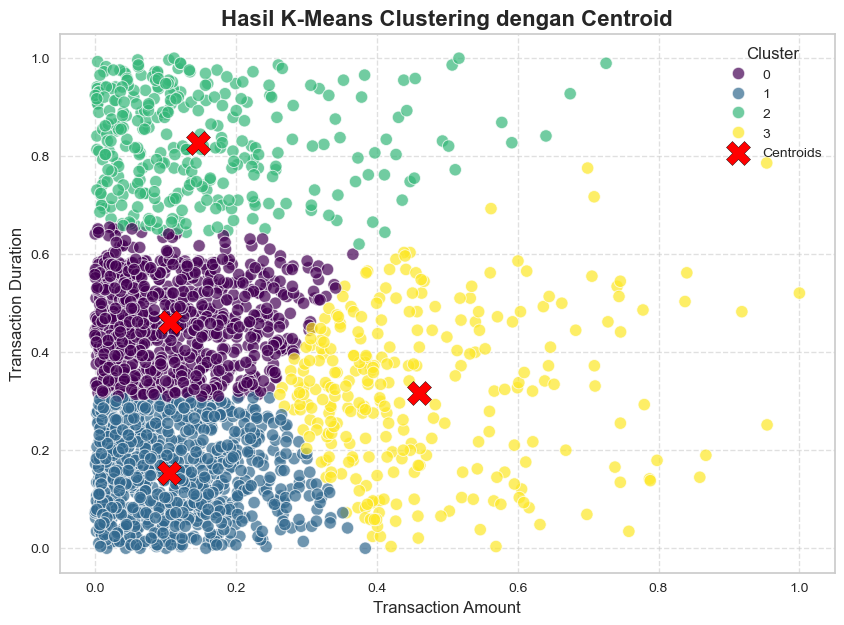

In [33]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X['TransactionAmount'], y=X['TransactionDuration'], hue=df['Cluster'],
                palette='viridis', s=80, alpha=0.7, legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids', edgecolor='black')
plt.title('Hasil K-Means Clustering dengan Centroid', fontsize=16, weight='bold')
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Transaction Duration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster', loc='upper right')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4, random_state=0)
kmeans_pca.fit(df_pca)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [35]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [36]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['Cluster'] = kmeans_pca.labels_

cluster_interpretation = df.groupby('Cluster').agg(
    mean_transaction=('TransactionAmount', 'mean'),
    min_transaction=('TransactionAmount', 'min'),
    max_transaction=('TransactionAmount', 'max'),
    count=('Cluster', 'size')
).round(2)

print("Analisis Deskriptif Berdasarkan Cluster (dari Model PCA):")
display(cluster_interpretation)

Analisis Deskriptif Berdasarkan Cluster (dari Model PCA):


,mean_transaction,min_transaction,max_transaction,count
Cluster,,,,
0,0.11,0.00,0.37,862
1,0.10,0.00,0.38,882
2,0.15,0.00,0.73,319
3,0.46,0.26,1.00,285


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 3: Transaksi "Mencurigakan"**:
  - **Rata-rata (mean) TransactionAmount:** 0.46 ($882.39)
  - **Analisis:** Cluster 3 harus menjadi prioritas utama untuk diawasi. Transaksi yang masuk ke dalam pola ini (nilai tinggi dan tidak biasa) paling berisiko.

2. **Cluster 2: Transaksi "Mencurigakan" namun masih dalam batas wajar**:
  - **Rata-rata (mean) TransactionAmount:** 0.15 ($281.26)
  - **Analisis:** Cluster 2 dapat menjadi prioritas kedua untuk diawasi. Transaksi yang masuk ke dalam pola ini tidak terlalu berisiko namun masih memiliki kemungkinan.

3. **Cluster 0 dan 1: Transaksi "Mencurigakan" namun masih dalam batas wajar**:
- **Rata-rata (mean) TransactionAmount:** 0.11 ($0.84) dan 0.10 ($0.26)
- **Analisis:** mewakili perilaku normal dengan risiko rendah.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [37]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = kmeans.labels_

In [38]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [39]:
# inverse dataset ke rentang normal untuk numerikal
df[numCols] = scaler.inverse_transform(df[numCols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Cluster,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 8:08:08,1,1
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 8:09:35,0,0
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 8:07:04,1,1
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 8:09:06,1,1
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 8:06:36,0,0


In [40]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in catCols:
     le = encoders[col]
     df[col] = le.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Cluster,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,0,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,0,0


In [44]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numerical_aggregations = {col: ['mean', 'min', 'max'] for col in numCols}

numerical_analysis = df.groupby('Cluster').agg(numerical_aggregations).round(2)

display(numerical_analysis)

TransactionAmount                  CustomerAge              \
                     mean     min      max        mean   min   max   
Cluster                                                              
0                  205.70    0.26   702.87       45.19  18.0  80.0   
1                  201.74    0.84   736.73       44.74  18.0  80.0   
2                  281.26    1.41  1392.54       43.99  18.0  80.0   
3                  882.39  504.12  1919.11       43.79  18.0  80.0   

        TransactionDuration               LoginAttempts            \
                       mean    min    max          mean  min  max   
Cluster                                                             
0                    143.86  100.0  200.0          1.13  1.0  5.0   
1                     54.75   10.0   99.0          1.10  1.0  5.0   
2                    249.71  190.0  300.0          1.15  1.0  5.0   
3                    101.68   11.0  238.0          1.11  1.0  5.0   

        AccountBalance                    
                  mean     min       max  
Cluster                                   
0              5231.87  112.76  14942.78  
1              5045.87  101.25  14977.99  
2              5111.03  135.96  14928.35  
3              4914.88  102.20  14935.50

In [45]:
categorical_aggregations = {col: (lambda x: x.mode()[0]) for col in catCols}
categorical_analysis = df.groupby('Cluster').agg(categorical_aggregations)
display(categorical_analysis)

,TransactionType,Location,Channel,CustomerOccupation
Cluster,,,,
0,Debit,San Antonio,Branch,Engineer
1,Debit,Seattle,Branch,Student
2,Debit,Atlanta,ATM,Student
3,Debit,Austin,ATM,Student


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 3: Transaksi "Mencurigakan"**:
  - **Rata-rata (mean) TransactionAmount:** 0.46 ($882.39)
  - **Analisis:** Rata-rata transaksi yang ekstrem (**882.39**) dan nilai maksimum tertinggi (**1919.11**) menjadikannya kelompok **paling mencurigakan**. Penipu seringkali berusaha **memaksimalkan keuntungan dalam satu kali aksi**. Durasi transaksi yang relatif cepat (**101.68**) bisa menandakan penggunaan **skrip otomatis** atau tindakan **terburu-buru untuk menghindari deteksi**.

2. **Cluster 2: "Potensi Penipuan Terencana" (Potential Planned Fraud)**:
  - **Rata-rata (mean) TransactionAmount:** 0.15 ($281.26)
  - **Analisis:** Durasi transaksi yang **paling lama (249.71)** merupakan sinyal bahaya.  
Penipu mungkin memerlukan waktu lebih lama untuk:  
  - Mengeksplorasi akun yang berhasil dibobol guna mencari limit atau saldo.  
  - Melakukan beberapa percobaan sebelum berhasil. 
Meskipun nilai transaksinya tidak seekstrem Cluster 3, **kombinasi nilai menengah ke atas dan durasi tidak wajar** menjadikannya **kelompok berisiko kedua** yang perlu diawasi.

3. **Cluster 1: "Perilaku Normal Berisiko Rendah" (Low-Risk Normal Behavior)**:
- **Rata-rata (mean) TransactionAmount:** 0.11 ($0.84)
- **Analisis:** Cluster ini mewakili **transaksi sah dan aman**.  
Nilai transaksi yang rendah (**201.74**) dan durasi yang sangat cepat (**54.75**) menunjukkan **pembelian rutin** oleh pengguna asli.
Transaksi dalam kelompok ini memiliki **probabilitas fraud sangat rendah** dan menjadi acuan untuk perilaku normal pengguna.

4. **Cluster 0: "Perilaku Standar Berisiko Rendah" (Standard Low-Risk Behavior)**:
- **Rata-rata (mean) TransactionAmount:** 0.10 ($0.26)
- **Analisis:** Mirip dengan Cluster 1, kelompok ini juga mencerminkan **aktivitas pengguna sah**.  
Durasi yang rendah (**143.86**) bisa menandakan **belanja biasa tanpa urgensi tinggi**.  
Dari perspektif deteksi penipuan, cluster ini **berisiko rendah** dan merupakan bagian dari **aktivitas transaksi normal**.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [46]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df = df.drop(columns='Cluster', axis=1)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,0


In [47]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.